#Assignment 3.2: LSTM ASSIGNMENT

This assignment is aimed at implementing LSTMs that we had learnt in class. In this task, we'll implement a model that takes text data as input and returns the emotion behind the text.

## TEXT PRE-PROCESSING FOR NLP

**Import the dataset.**

In [3]:
import pandas as pd
df = pd.read_csv('/content/new_dataset.csv')
df.head()

sentiment                                               text
0  Negative  @xnausikaax oh no! where did u order from? tha...
1  Negative  A great hard training weekend is over.  a coup...
2  Negative  Right, off to work  Only 5 hours to go until I...
3  Negative                    I am craving for japanese food 
4  Negative  Jean Michel Jarre concert tomorrow  gotta work...

sentiment                                               text
0  Negative  @xnausikaax oh no! where did u order from? tha...
1  Negative  A great hard training weekend is over.  a coup...
2  Negative  Right, off to work  Only 5 hours to go until I...
3  Negative                    I am craving for japanese food 
4  Negative  Jean Michel Jarre concert tomorrow  gotta work...

**The dataset clearly has a large no. of redundant words, because that is simply how we humans talk. We'll first remove the stopwords.**


In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(df):
  mod_df = []

  for w in df.split():
    if w in stopwords.words('english'):
      mod_df.append(' ')
    else :
      mod_df.append(w)
  return " ".join(mod_df)

df['text'] = df['text'].apply(remove_stopwords)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


sentiment                                               text
0  Negative  @xnausikaax oh no!     u order from? that's ho...
1  Negative  A great hard training weekend   over.   couple...
2  Negative    Right,     work Only 5 hours   go   I'm free xD
3  Negative                        I   craving   japanese food
4  Negative  Jean Michel Jarre concert tomorrow gotta work ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


sentiment                                               text
0  Negative   @xnausikaax oh no! u order from? that's horrible
1  Negative  A great hard training weekend over. couple day...
2  Negative            Right, work Only 5 hours go I'm free xD
3  Negative                            I craving japanese food
4  Negative  Jean Michel Jarre concert tomorrow gotta work ...

**Next, we'll remove some other info we dont need right now, like the handle names.**

In [6]:
import string
string.punctuation
def remove_punc(df):
  for char in string.punctuation:
    df =df.replace(char,' ')
  return df
import re
def remove_handles(df):
  return re.sub(r'@\w+', '',df)

df['text'] = df['text'].apply(remove_handles)
df['text'] = df['text'].apply(remove_punc)
df.head(5)

sentiment                                               text
0  Negative           oh no      u order from  that s horrible
1  Negative  A great hard training weekend   over    couple...
2  Negative    Right      work Only 5 hours   go   I m free xD
3  Negative                        I   craving   japanese food
4  Negative  Jean Michel Jarre concert tomorrow gotta work ...

sentiment                                               text
0  Negative                 oh no u order from that s horrible
1  Negative  A great hard training weekend over couple days...
2  Negative             Right work Only 5 hours go I m free xD
3  Negative                            I craving japanese food
4  Negative  Jean Michel Jarre concert tomorrow gotta work ...

**Now, we'll perform stemming, wherein we'll reduce the words to their root form.**

In [7]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer = WordNetLemmatizer()
def lemmatize_words(df):
  return " ".join([lemmatizer.lemmatize(word) for word in df.split()])

df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(lemmatize_words)
df.head(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


sentiment                                               text
0  Negative                 oh no u order from that s horrible
1  Negative  a great hard training weekend over couple day ...
2  Negative              right work only 5 hour go i m free xd
3  Negative                            i craving japanese food
4  Negative  jean michel jarre concert tomorrow gotta work ...

sentiment                                               text
0  Negative                     oh no u order from that s horr
1  Negative  a great hard training weekend over couple days...
2  Negative             right work only 5 hours go i m free xd
3  Negative                            i craving japanese food
4  Negative  jean michel jarre concert tomorrow gotta work ...

**Now that we are done with pre-processing, lets see what the gist of the data is that our model should capture.**
**Generate a word-cloud for the positive and negative words of the dataset.**

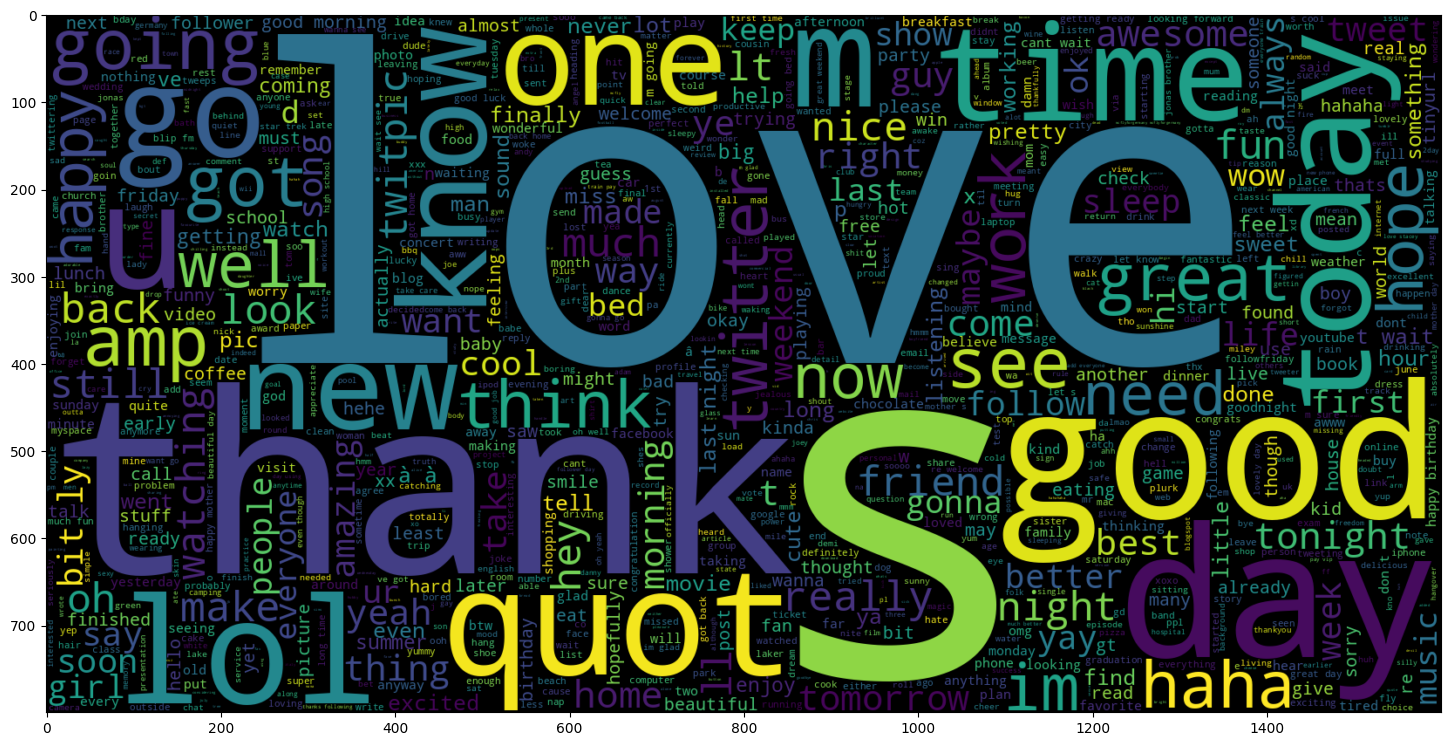

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
type(df['sentiment'][0])

positive_words = ' '.join(df[df['sentiment'] == 'Positive']['text'])
wordcloud = WordCloud(
    width=1600,
    height=800,
    max_words=1000,
    background_color='black',
    colormap='viridis').generate(positive_words)

plt.figure(figsize=(18, 10))
plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")  # Hide axes
plt.show()

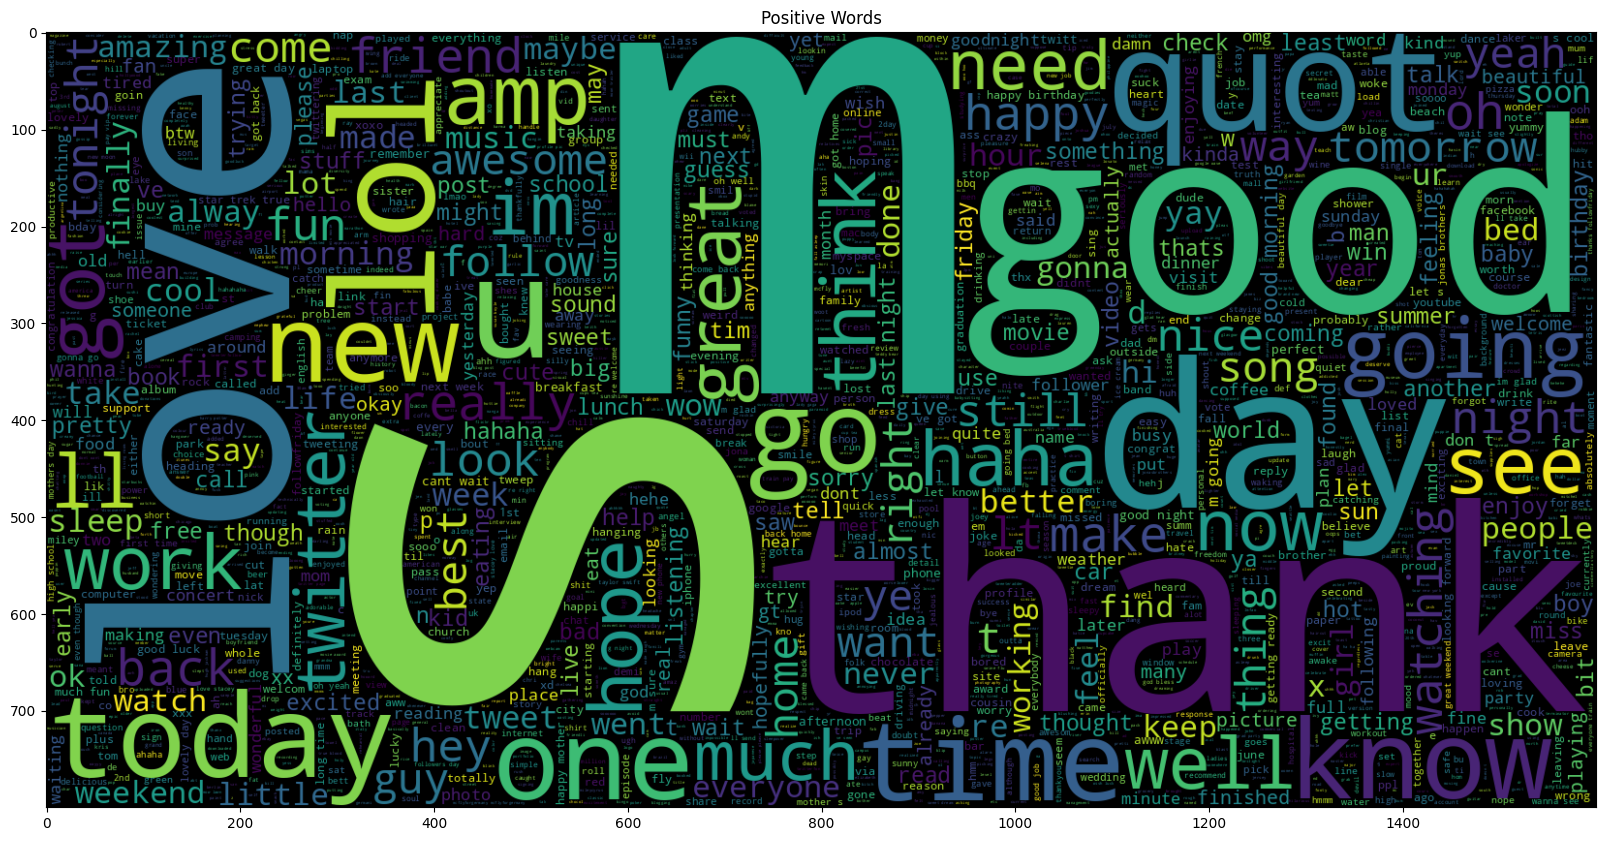

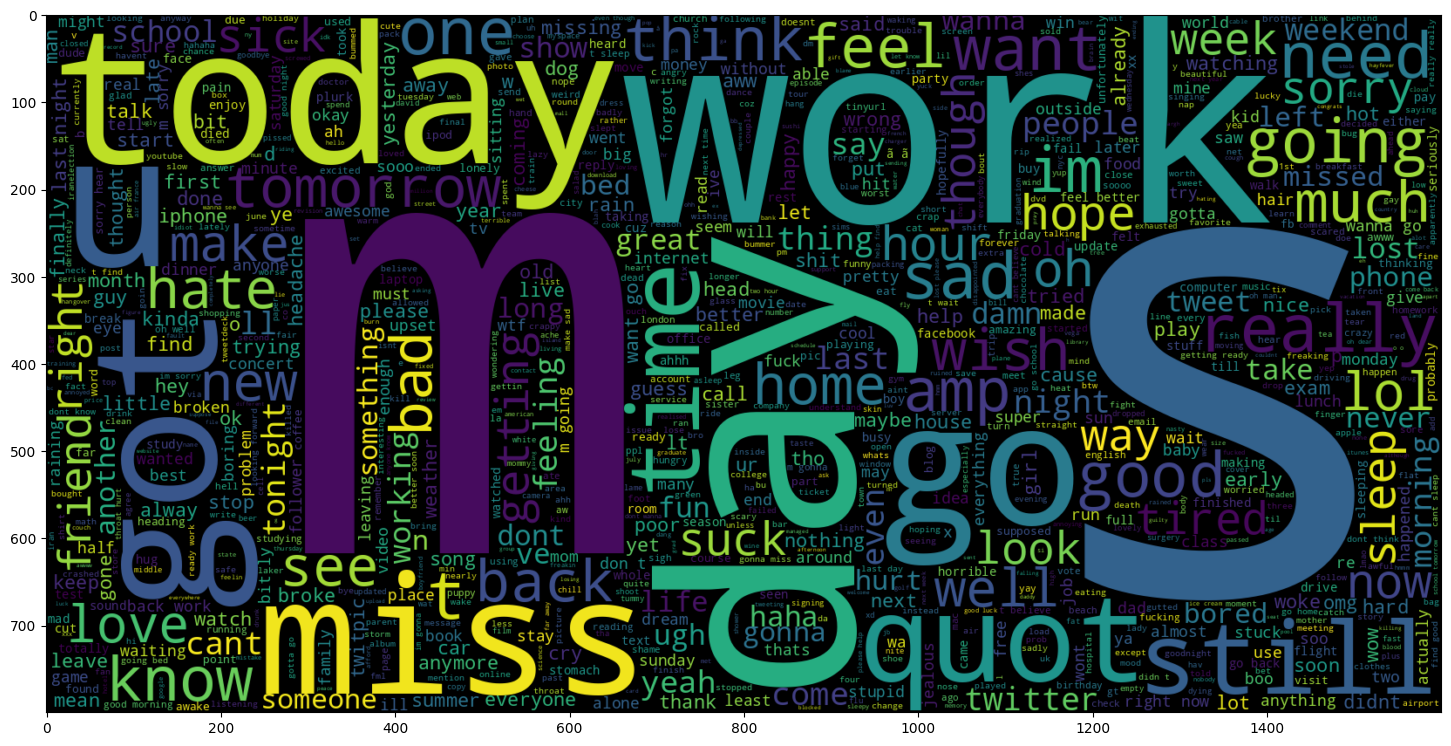

In [23]:
negative_words = ' '.join(df[df['sentiment'] == 'Negative']['text'])

new_wordcloud = WordCloud(
    width=1600,
    height=800,
    max_words=1000,
    background_color='black',
    colormap='viridis').generate(negative_words)

plt.figure(figsize=(18, 10))
plt.imshow(new_wordcloud, interpolation='bilinear')
#plt.axis("off")  # Hide axes
plt.show()

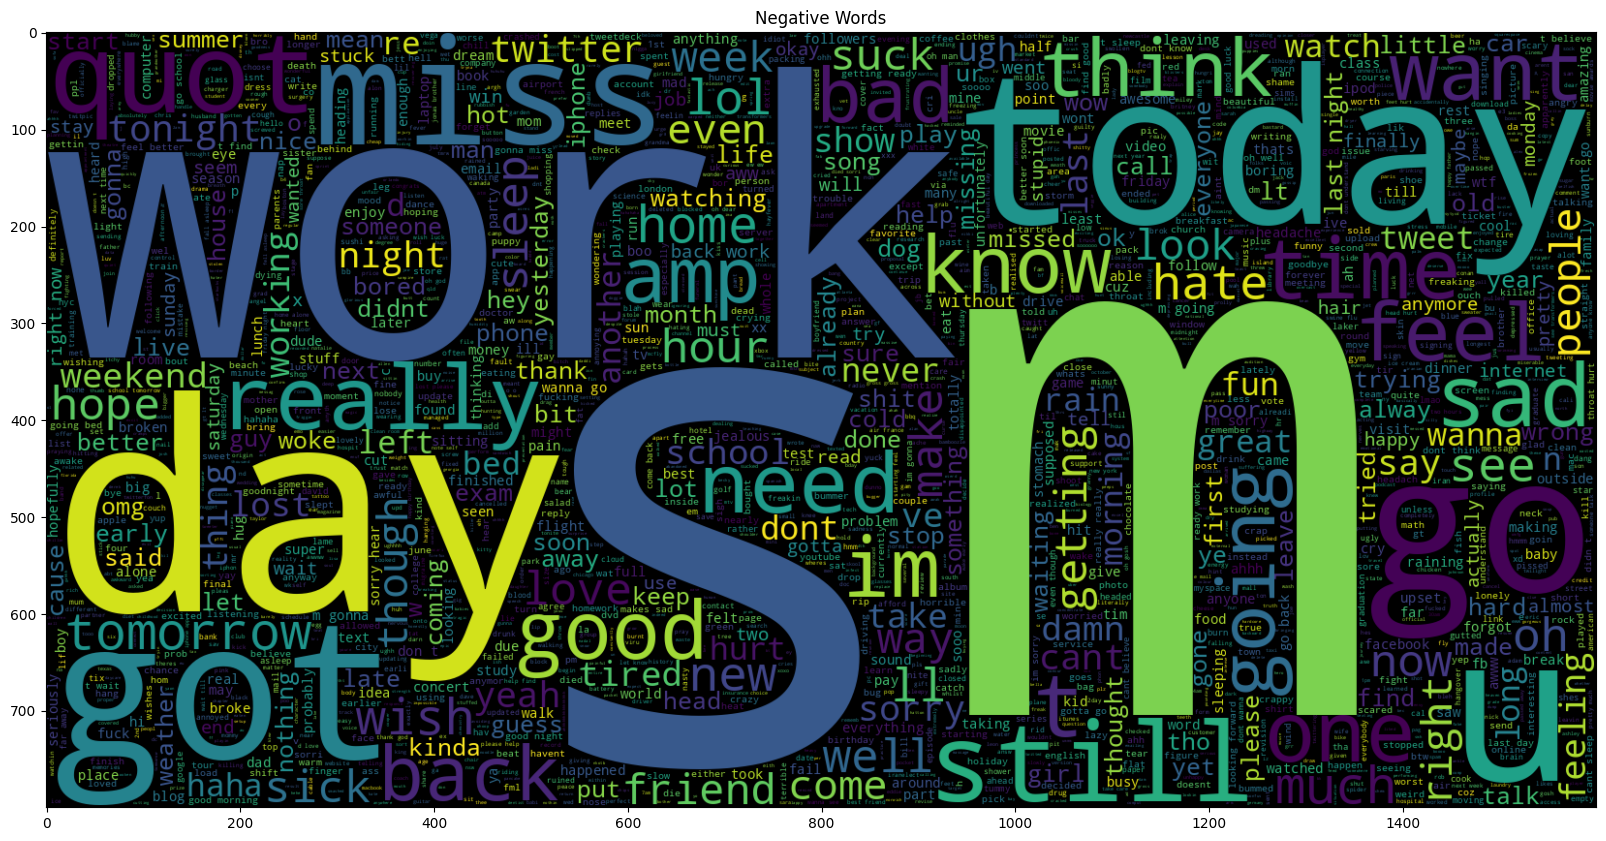

**I'd like to point out that 'Work' is bigger in the negative words display than it is in the positive words one.**

## TRAINING

**We have now processed the data for training. It's time for us to split it into training and test splits.**

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['text'],df['sentiment'],test_size = 0.1)
print("Training set size:", len(x_train))
print("Test set size:", len(x_test))

Training set size: 9000
Test set size: 1000


Training Set Size: 9000
Test Set Size: 1000


**It is now time to convert our text sequences into numbers like the model will understand. Fit a tokenizer on the training dataset for the same. Let the vocab size be the no of unique words itself.**

In [30]:
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
x_train_tokens = x_train.apply(word_tokenize)
x_test_tokens = x_test.apply(word_tokenize)

unique_words = set()

for tokens in x_train_tokens:
    unique_words.update(tokens)
print("vocabulary size:", len(unique_words))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


vocabulary size: 12353


Vocabulary Size : 13511


**Now transform the training and testing word sequences.**

In [31]:
word_index = {}
index =1
for word in unique_words:
  if word not in word_index:
    word_index[word] = index
    index += 1

def tokens_to_seq(tokens):
  return [word_index[word] for word in tokens if word in word_index]

x_train_seq = x_train_tokens.apply(tokens_to_seq)
x_test_seq = x_test_tokens.apply(tokens_to_seq)
print ("Training data:")
print(x_train_seq.iloc[0])
print ("Testing data:")
print(x_test_seq.iloc[0])

Training data:
[769, 3093, 10458, 11507, 5354, 341, 223, 3027, 1810, 5465, 4892, 9734, 4103, 6212]
Testing data:
[8506, 138, 9646, 8147]


Training data:
[1, 25, 411, 5140, 954, 1222, 954, 20, 894, 107, 5141]
Testing data:
[322, 677, 2477, 2488, 181, 618]


**It is necessary for the simplicity of the model that each text sequence be of the same length. Pad the sequences to make this possible.**

In [33]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train_padded = pad_sequences(x_train_seq,maxlen=36,padding='pre',truncating='pre')
x_test_padded = pad_sequences(x_test_seq,maxlen=36,padding='pre',truncating='pre')
print("Training data")
print(x_train_padded[0])
print("Testing data")
print(x_test_padded[0])

Training data
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0   769  3093
 10458 11507  5354   341   223  3027  1810  5465  4892  9734  4103  6212]
Testing data
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0 8506  138 9646 8147]


Training data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    1   25  411
 5140  954 1222  954   20  894  107 5141]
Testing data:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  322  677 2477 2488  181  618]


**Label encode y.**

In [37]:
import numpy as np

In [38]:
y_train_encoded = []
for label in y_train:
    if label == 'Positive':
        y_train_encoded.append(1)
    else:
        y_train_encoded.append(0)
y_test_encoded = []
for label in y_test:
    if label == 'Positive':
        y_test_encoded.append(1)
    else:
        y_test_encoded.append(0)
print("The training labels")
print(np.array(y_train_encoded))
print("The testing labels:")
print(np.array(y_test_encoded))

The training labels
[0 0 1 ... 0 1 0]
The testing labels:
[0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0
 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0
 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0
 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1
 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1
 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1
 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0
 1 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0

The training labels:
[0 0 0 ... 1 0 1]
The testing labels:
[1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0
 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1
 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0
 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0
 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0
 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 

**FOLLOWING CODE IS FOR CREATING WORD EMBEDDINGS. DON'T TOUCH IT.JUST REPLACE VOCAB_SIZE WITH THE VOCABULARY SIZE OBTAINED EARLIER.**

In [41]:
import tensorflow as tf
import numpy as np
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-06-18 17:28:39--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-18 17:28:40--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-18 17:28:40--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zi

In [48]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../content/best_model.hdf5'
embeddings_index = {}
f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' %len(embeddings_index))
embedding_matrix = np.zeros((len(unique_words)+1, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector
embedding_layer = tf.keras.layers.Embedding(len(unique_words)+1,EMBEDDING_DIM,weights=[embedding_matrix],input_length=MAX_SEQUENCE_LENGTH,trainable=False)

Found 400000 word vectors.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


![Sequence Model](https://miro.medium.com/max/1458/1*SICYykT7ybua1gVJDNlajw.png)

**You should read up on why we added the previou code block.The embedding layer created is to be used in the model. Use the model summary to build the rest. Compile the model with Adam and a suitable loss function.**

In [49]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)

from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

x = SpatialDropout1D(0.2)(embedding_sequences)

x = Conv1D(64, kernel_size=3, activation='relu')(x)

x = Bidirectional(LSTM(64, return_sequences=True))(x)
from tensorflow.keras.layers import GlobalMaxPooling1D
x = GlobalMaxPooling1D()(x)

x = Dropout(0.5)(x)
x = Dense(64, activation='relu')(x)

preds = Dense(1, activation='sigmoid')(x)

model = Model(sequence_input, preds)

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 36)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 36, 300)        │     3,706,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 36, 300)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 34, 64)         │        57,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 34, 128)        │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,838,233 (14.64 MB)

 Trainable params: 132,033 (515.75 KB)

 Non-trainable params: 3,706,200 (14.14 MB)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 36)]              0         
                                                                 
 embedding_1 (Embedding)     (None, 36, 300)           4053300   
                                                                 
 spatial_dropout1d_1 (Spati  (None, 36, 300)           0         
 alDropout1D)                                                    
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 64)            96064     
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               66048     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 512)               6604

**Train the model on the train split, and validate it on the test split.**

In [51]:
history = model.fit(
    x_train_padded,
    y_train_encoded,
    batch_size=32,
    epochs=10,
    validation_data=(x_test_padded, y_test_encoded))

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - accuracy: 0.7272 - loss: 0.5347 - val_accuracy: 0.7200 - val_loss: 0.5482
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.7730 - loss: 0.4812 - val_accuracy: 0.7290 - val_loss: 0.5373
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - accuracy: 0.7840 - loss: 0.4506 - val_accuracy: 0.7040 - val_loss: 0.5655
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - accuracy: 0.8103 - loss: 0.4059 - val_accuracy: 0.6920 - val_loss: 0.5706
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - accuracy: 0.8505 - loss: 0.3619 - val_accuracy: 0.6780 - val_loss: 0.6347
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.8692 - loss: 0.3072 - val_accuracy: 0.6950 - val_loss: 0.6723
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.8957 - loss: 0.2545 - val_accuracy: 0.6760 - val_loss: 0.6768
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8967 - loss: 0.2429 - 

Epoch 1/10
9/9 [==============================] - 39s 3s/step - loss: 0.6791 - accuracy: 0.5733 - val_loss: 0.6374 - val_accuracy: 0.6330
Epoch 2/10
9/9 [==============================] - 19s 2s/step - loss: 0.6207 - accuracy: 0.6628 - val_loss: 0.6137 - val_accuracy: 0.6540
Epoch 3/10
9/9 [==============================] - 19s 2s/step - loss: 0.5882 - accuracy: 0.6919 - val_loss: 0.5981 - val_accuracy: 0.6700
Epoch 4/10
9/9 [==============================] - 15s 2s/step - loss: 0.5676 - accuracy: 0.7080 - val_loss: 0.5911 - val_accuracy: 0.6670
Epoch 5/10
9/9 [==============================] - 22s 3s/step - loss: 0.5480 - accuracy: 0.7160 - val_loss: 0.5849 - val_accuracy: 0.6890
Epoch 6/10
9/9 [==============================] - 13s 1s/step - loss: 0.5273 - accuracy: 0.7290 - val_loss: 0.5836 - val_accuracy: 0.6880
Epoch 7/10
9/9 [==============================] - 22s 2s/step - loss: 0.5094 - accuracy: 0.7477 - val_loss: 0.5846 - val_accuracy: 0.7070
Epoch 8/10
9/9 [==================

**Let's visualise the model's training history now.**

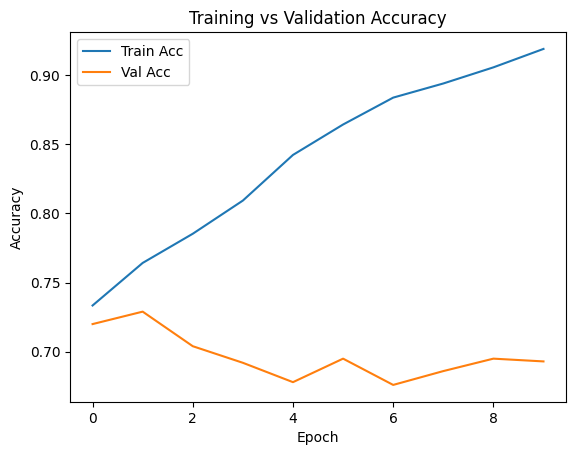

In [52]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

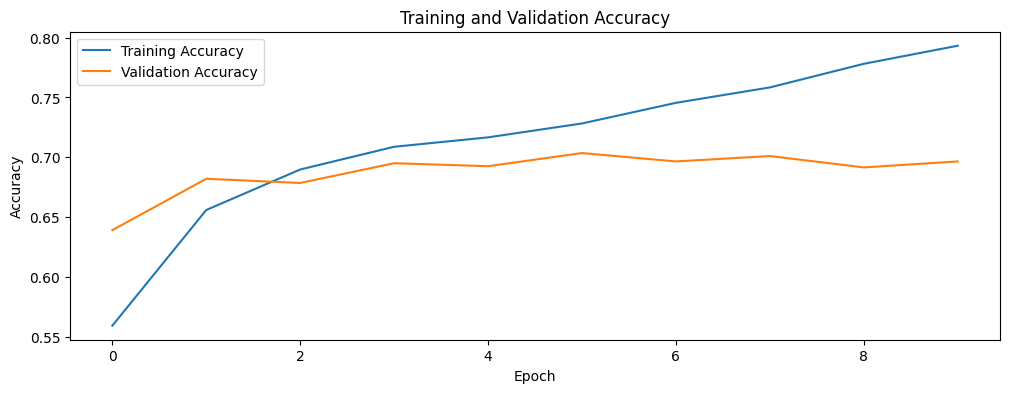

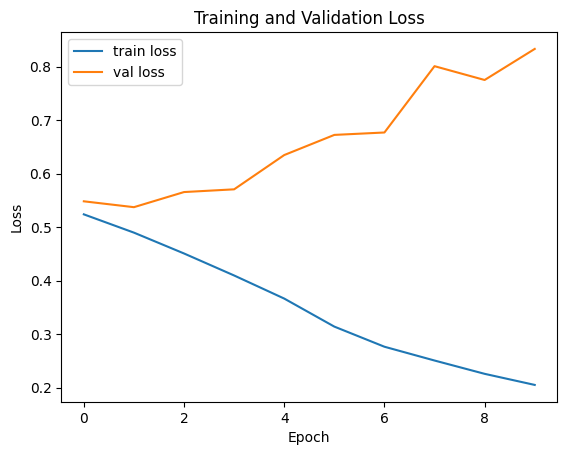

In [53]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

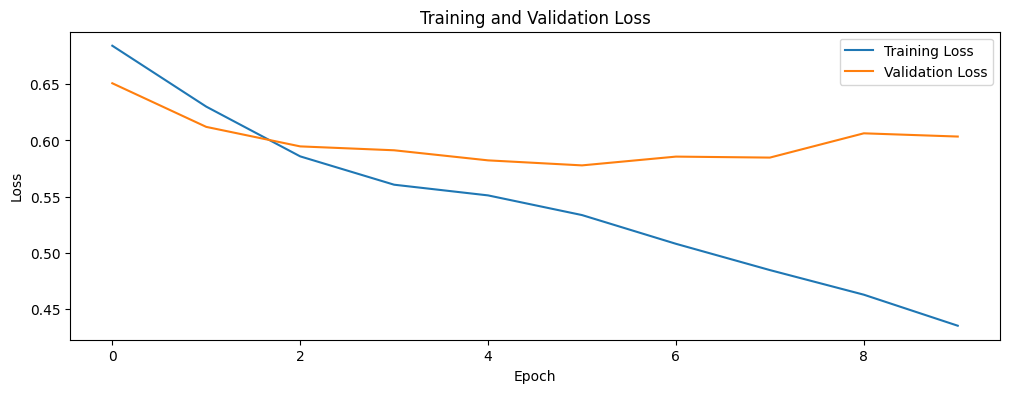

**Lets see what the accuracy of the model is.**

In [54]:
from sklearn.metrics import classification_report
y_pred_probs = model.predict(x_test_padded)
y_pred = (y_pred_probs > 0.5).astype("int32")
print(classification_report(y_test_encoded, y_pred, target_names=['0', '1']))

32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       516
           1       0.68      0.70      0.69       484

    accuracy                           0.69      1000
   macro avg       0.69      0.69      0.69      1000
weighted avg       0.69      0.69      0.69      1000



63/63 [==============================] - 2s 24ms/step
              precision    recall  f1-score   support

           0       0.72      0.66      0.69      1012
           1       0.68      0.73      0.70       988

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000



**Take a random input sequence from the text series. First predict on it nd gets its sentiment. Then decode the string using the tokenizer, etc. you've developed and print the string as well.**

In [57]:
print(df.text[448])
print(tokens_to_seq (word_tokenize(df.text[0])))
new_seq = pad_sequences([tokens_to_seq (word_tokenize(df.text[0]))],maxlen=36,padding='pre',truncating='pre')
print(new_seq)
prediction =model.predict(new_seq)
sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
print(f"Predicted sentiment: {sentiment}")
meow=df.sentiment[447]
print(f"Predicted sentiment: {meow}")

sending angry vibe individual blue vehicle hit car qfc parking lot broad failed leave note
[10395, 9884, 8652, 5430, 2836, 1730, 6913, 3631]
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0 10395  9884  8652  5430  2836  1730  6913  3631]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Predicted sentiment: Negative
Predicted sentiment: Negative


The chosen sequence is: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0  402 2498  165   91  201    5]
1/1 [==============================] - 1s 835ms/step
The predicted sentiment is: ['Negative']
The original sentiment is: ['Negative']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
index_to_word = {idx: word for word, idx in word_index.items()}
def seq_to_tokens(seq):
    return [index_to_word.get(idx, '') for idx in seq if idx != 0]
decoded = seq_to_tokens([10395, 9884, 8652, 5430, 2836, 1730, 6913, 3631])
print("Decoded:", decoded)

Decoded: ['oh', 'no', 'u', 'order', 'from', 'that', 's', 'horrible']


['dad', 'fever', 'again', 'not', 'looking', 'good']


**We can try this on a random string as well.**

In [61]:
input_str="I hate everyone on earth!"
print("After removal of stopwords:")
print(remove_stopwords(input_str))
input_str = remove_stopwords(input_str)
print("After removal of punctuations:")
print(remove_punc(input_str))
input_str = remove_punc(input_str)
print("After lemmatization:")
print(lemmatize_words(input_str))
input_str = lemmatize_words(input_str)
input_str = lemmatize_words(input_str)
print(tokens_to_seq (word_tokenize(input_str)))
input_seq = pad_sequences([tokens_to_seq (word_tokenize(input_str))],maxlen=36,padding='pre',truncating='pre')
print(input_seq)
prediction =model.predict(input_seq)
sentiment = 'Positive' if prediction[0][0] > 0.5 else 'Negative'
print(f"Predicted sentiment: {sentiment}")

After removal of stopwords:
I hate everyone   earth!
After removal of punctuations:
I hate everyone   earth 
After lemmatization:
I hate everyone earth
[5310, 6461, 7697]
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0 5310 6461 7697]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Predicted sentiment: Negative


After removal of stopwords: 0    I hate everyone earth!
dtype: object
After removal of punctuation: 0    I hate everyone earth 
dtype: object
After stemming: 0    i hate everyone earth 
dtype: object
After tokenization: [[1, 100, 138, 2693]]
After padding: [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    1  100  138 2693]]
1/1 [==============================] - 0s 58ms/step
The predicted sentiment is: ['Negative']


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## GOOD JOB!